In [1]:
# requires installing ipympl
%matplotlib widget 

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import time

 # Simulate projectile motion with some constant wind (drag in x)

In [2]:
def simulate(initial_velocity,drag_coef,mass,time_step):
    """
    Function to simulate projectile motion. Considered in a 2D (x,y) plane
    beginning with projectile at (0,0) with some initial velocity and some
    air resistance force on the projectile in the x direction. Simulation
    is done using Euler's method and proceeds until projectile hits the
    ground.
    
    Inputs:
    initial_velocity - the initial velocity of the projectile (np.array)
    drag_coef        - the drag coefficient representing the object geometry (float)
    mass             - the mass of the object (float)
    time_step        - the time_step used to simulate
    
    Outputs:
    x                - the positions at each point in time
    """
    a = []
    v = []
    x = []
    
    x.append(np.array([0.0,0.01]))
    v.append(initial_velocity)
    
    g = np.array([0.0,-9.81])
    drag = np.array([drag_coef/mass, 0.0])
    
    while x[-1][1] > 0:
        a.append(g - drag*v[-1])
        x.append(x[-1] + time_step*v[-1])
        v.append(v[-1] + time_step*a[-1])
    
    # a.append(g - (b/m)*v[-1]*v[-1])
    
    return np.array(x)

In [3]:
xs = simulate(np.array([10,10]),0.2,1,.01)

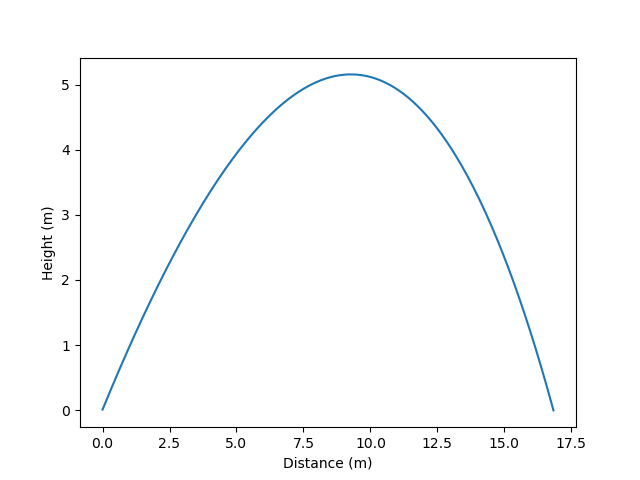

In [4]:
plt.close()
plt.figure()
plt.plot(xs[:,0],xs[:,1])
plt.ylabel("Height (m)")
plt.xlabel("Distance (m)")
plt.show()

FloatSlider(value=65.0, description='Start angle', max=89.0, min=1.0, step=2.0)

FloatSlider(value=8.0, description='Initial velocity', max=10.0, min=1.0, step=0.5)

FloatSlider(value=1.0, description='Wind coefficient', max=2.0, min=-1.0)

FloatSlider(value=1.0, description='Mass', max=10.0, min=1.0, step=0.5)

Button(description='Throw ball', style=ButtonStyle())

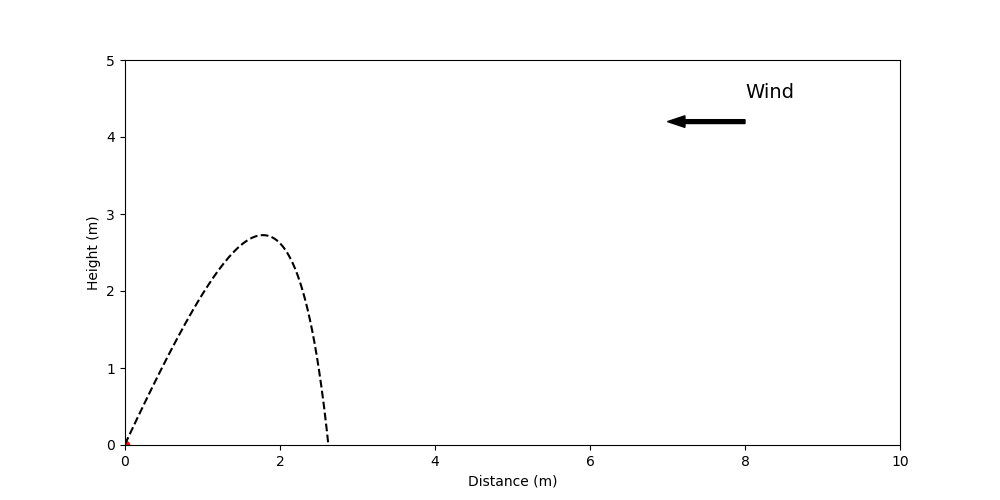

In [20]:
plt.close()

#####################################################################################
# Make slider widgets
#####################################################################################

angle = widgets.FloatSlider(min=1,max=89,step=2,description="Start angle",value = 65)
magnitude = widgets.FloatSlider(min=1,max=10,step=.5,description="Initial velocity",value = 8)
wind = widgets.FloatSlider(min=-1,max=2,step=.1,description="Wind coefficient",value = 1)
mass = widgets.FloatSlider(min=1,max=10,step=.5,description="Mass",value = 1)
play = widgets.Button(description="Throw ball")

# Print widgets
display(angle); display(magnitude); display(wind); display(mass); display(play)


#####################################################################################
# Make functions to update plots when changing sliders
#####################################################################################
def plot_ball_motion(obj):
    # Recalculate trajectory
    vx = magnitude.value*np.cos(angle.value*(np.pi/180))
    vy = magnitude.value*np.sin(angle.value*(np.pi/180))
    xs = simulate(np.array([vx,vy]),wind.value,mass.value,.01)
    
    # Update ball location one step at a time
    for x in xs:
        time1 = time.time()
        ball.set_offsets(x)
        time2 = time.time()
        time.sleep(.01 - (time2-time1)) # Based on simulation with time step of size .01
        fig.canvas.draw()
        fig.canvas.flush_events()
        
def plot_trajectory(obj):
    # Recalculate trajectory
    vx = magnitude.value*np.cos(angle.value*(np.pi/180))
    vy = magnitude.value*np.sin(angle.value*(np.pi/180))
    xs = simulate(np.array([vx,vy]),wind.value,mass.value,.01)
    
    # Update trajectory path and wind
    wind_plot.set_data(dx=-wind.value)
    traj.set_data(xs[:,0],xs[:,1])
    fig.canvas.draw_idle()
    fig.canvas.flush_events()
    
def change_ball_size(obj):
    ball.set_sizes([mass.value*72])
        
#####################################################################################
# Initialize plot
#####################################################################################
fig = plt.figure(figsize=(10,5))
vx = magnitude.value*np.cos(angle.value*(np.pi/180))
vy = magnitude.value*np.sin(angle.value*(np.pi/180))
xs = simulate(np.array([vx,vy]),wind.value,mass.value,.01)
traj = plt.plot(xs[:,0],xs[:,1],ls="--",color="black")[0]
ball = plt.scatter([0],[0],color="red")
wind_plot = plt.arrow(8,4.2,-wind.value,0,length_includes_head=True,width=.05,color="black")
wind_label = plt.text(8,4.5,"Wind",fontsize=14)
plt.ylabel("Height (m)")
plt.xlabel("Distance (m)")
plt.xlim(0,10)
plt.ylim(0,5)
fig.canvas.draw_idle()
fig.canvas.flush_events()
    
#####################################################################################
# Watch sliders for changes
#####################################################################################
play.on_click(plot_ball_motion)
angle.observe(plot_trajectory)
magnitude.observe(plot_trajectory)
wind.observe(plot_trajectory)
mass.observe(plot_trajectory)
mass.observe(change_ball_size)

# Simulate with non-constant wind

In [21]:
# Wind as a random combination of chebyshev polynomials

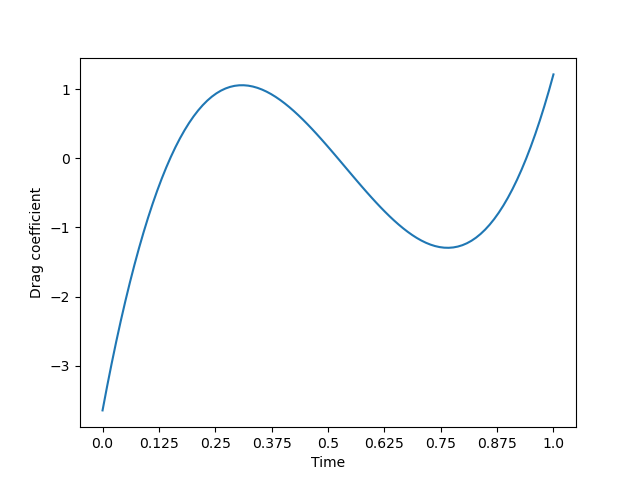

In [22]:
domain = np.linspace(-1,1,100)
n = 4

poly = np.zeros(100)
for i in range(n):
    poly += np.random.normal()*np.cos(i*np.arccos(domain))

plt.close()
fig = plt.figure()
plt.plot(domain, poly)
plt.ylabel("Drag coefficient")
plt.xticks(np.linspace(-1,1,9),np.linspace(0,1,9))
plt.xlabel("Time")
plt.show()

In [23]:
def generate_wind(num_steps,wind_variability,wind_strength):
    """
    Function to generate smooth wind profiles by randomly combining
    Chebyshev polynomials.
    
    Inputs:
    num_steps         - the number of steps that will need wind applied to (np.array)
    wind_variability  - how often the wind changes direction (integer 0-10)
    wind_strength     - how strong the wind is (float)
    
    Outputs:
    winds             - drag coefficients for each step in time, same length as num_steps
    """
    poly_domain = np.linspace(-1,1,num_steps)
    winds = np.zeros(num_steps)
    for i in range(wind_variability):
        winds += wind_strength*np.random.normal()*np.cos(i*np.arccos(poly_domain))
    return winds

def simulate_with_wind(initial_velocity,mass,time_step,winds):
    """
    Function to simulate projectile motion. Considered in a 2D (x,y) plane
    beginning with projectile at (0,0) with some initial velocity and some
    air resistance force on the projectile in the x direction. Simulation
    is done using Euler's method and proceeds until projectile hits the
    ground.
    
    Inputs:
    initial_velocity - the initial velocity of the projectile (np.array)
    mass             - the mass of the object (float)
    time_step        - the time_step used to simulate (float)
    
    Outputs:
    x                - the positions at each point in time
    """
    # First to find time domain (probably a better way...)
    a = []; v = []; x = []
    
    x.append(np.array([0.0,0.01]))
    v.append(initial_velocity)
    
    g = np.array([0.0,-9.81])
    
    i = 0
    while x[-1][1] > 0:
        drag = np.array([winds[i]/mass, 0.0])
        a.append(g - drag*v[-1])
        x.append(x[-1] + time_step*v[-1])
        v.append(v[-1] + time_step*a[-1])
        i += 1
    
    return np.array(x)

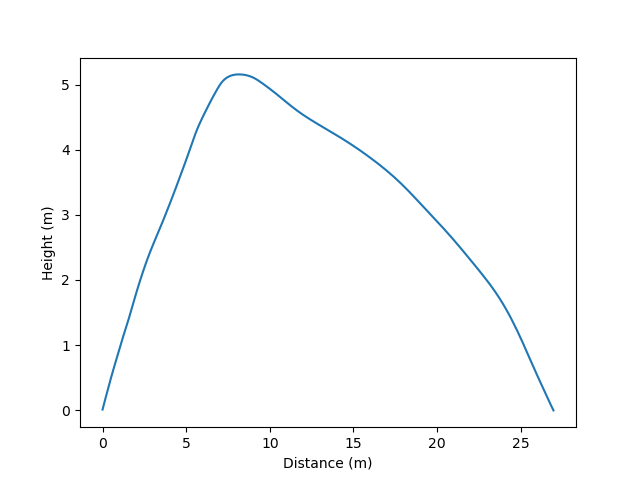

Number of steps before impact:  206


In [24]:
plt.close()
plt.figure()
ws = generate_wind(220,50,5)
xs = simulate_with_wind(np.array([10,10]), 10, .01,ws)
plt.plot(xs[:,0],xs[:,1])
plt.ylabel("Height (m)")
plt.xlabel("Distance (m)")
plt.show()
print("Number of steps before impact: ", len(xs))

FloatSlider(value=65.0, description='Start angle', max=89.0, min=1.0, step=2.0)

FloatSlider(value=8.0, description='Initial velocity', max=10.0, min=1.0, step=0.5)

FloatSlider(value=1.0, description='Mass', max=10.0, min=1.0, step=0.5)

IntSlider(value=5, description='Wind variability', max=20)

FloatSlider(value=1.0, description='Wind strength', max=2.0)

Button(description='Throw ball', style=ButtonStyle())

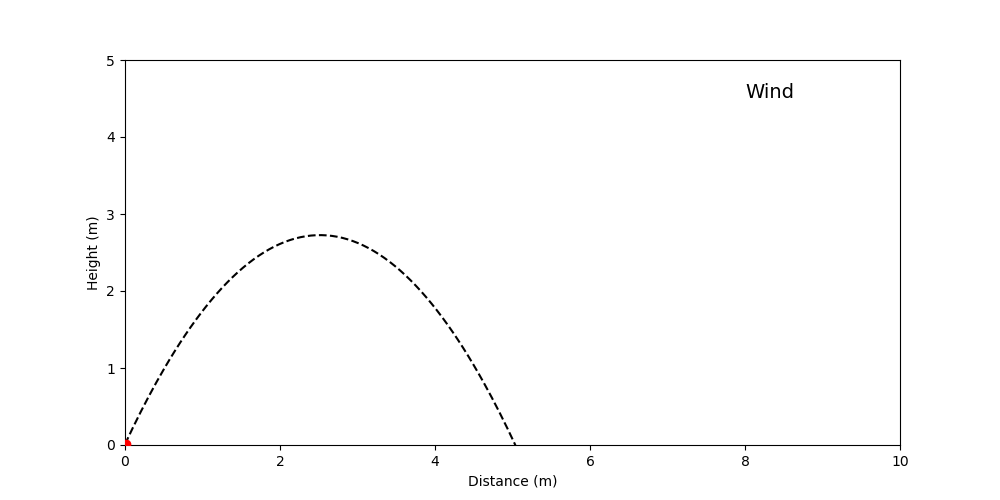

In [25]:
plt.close()
#####################################################################################
# Make slider widgets
#####################################################################################
angle = widgets.FloatSlider(min=1,max=89,step=2,description="Start angle",value = 65)
magnitude = widgets.FloatSlider(min=1,max=10,step=.5,description="Initial velocity",value = 8)
mass = widgets.FloatSlider(min=1,max=10,step=.5,description="Mass",value = 1)
wind_variability = widgets.IntSlider(min=0,max=20,step=1,description="Wind variability",value = 5)
wind_strength = widgets.FloatSlider(min=0,max=2,step=.1,description="Wind strength",value = 1)
play = widgets.Button(description="Throw ball")

display(angle); display(magnitude); display(mass)
display(wind_variability); display(wind_strength)
display(play)

#####################################################################################
# Make functions to update plots when changing sliders
#####################################################################################
def plot_ball_motion(obj):
    # Recompute trajectory
    vx = magnitude.value*np.cos(angle.value*(np.pi/180))
    vy = magnitude.value*np.sin(angle.value*(np.pi/180))
    ws = generate_wind(200,wind_variability.value,wind_strength.value)
    xs = simulate_with_wind(np.array([vx,vy]),mass.value,.01,ws)
    
    # Update ball location and wind strength one step at a time
    for i in range(len(xs)):
        x = xs[i]
        time1 = time.time()
        ball.set_offsets(x)
        true_traj.set_data(xs[:i,0],xs[:i,1])
        wind.set_data(dx=-ws[i]/2)
        time2 = time.time()
        time.sleep(.01 - (time2-time1))
        fig.canvas.draw()
        fig.canvas.flush_events()
        
def plot_trajectory(obj):
    # Recompute trajectory
    vx = magnitude.value*np.cos(angle.value*(np.pi/180))
    vy = magnitude.value*np.sin(angle.value*(np.pi/180))
    xs = simulate(np.array([vx,vy]),0,mass.value,.01)
    
    # Update trajectory plot
    traj.set_data(xs[:,0],xs[:,1])
    fig.canvas.draw_idle()
    fig.canvas.flush_events()
    
def change_ball_size(obj):
    ball.set_sizes([mass.value*72])

#####################################################################################
# Initialize plot
#####################################################################################
fig = plt.figure(figsize=(10,5))
vx = magnitude.value*np.cos(angle.value*(np.pi/180))
vy = magnitude.value*np.sin(angle.value*(np.pi/180))
xs = simulate(np.array([vx,vy]),0,mass.value,.01)
traj = plt.plot(xs[:,0],xs[:,1],ls="--",color="black")[0]
true_traj = plt.plot([0],[0],color="red",zorder=50)[0]
ball = plt.scatter([0.01],[0.01],color="red",zorder=100)
wind = plt.arrow(8,4.2,0,0,length_includes_head=True,width=.05,color="black")
wind_label = plt.text(8,4.5,"Wind",fontsize=14)
plt.ylabel("Height (m)")
plt.xlabel("Distance (m)")
plt.xlim(0,10)
plt.ylim(0,5)
fig.canvas.draw_idle()
fig.canvas.flush_events()
    
#####################################################################################
# Watch sliders for changes
#####################################################################################
play.on_click(plot_ball_motion)
angle.observe(plot_trajectory)
magnitude.observe(plot_trajectory)
mass.observe(plot_trajectory)
mass.observe(change_ball_size)

In [ ]:
plt.close()

# Train a neural network to predict the wind in the future

In [26]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = ""
from tensorflow import keras

2023-03-14 09:30:08.527338: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [174]:
# Generate training data
# # Take two previous wind steps to predict next
# num_steps = 250
# wind_variabilities = np.linspace(0,20,10)
# wind_strengths = np.linspace(0,2,10)
# num_wind_events = 2000

# samples = []
# for _ in range(num_wind_events):
#     wind_variability = int(np.random.choice(wind_variabilities))
#     wind_strength = np.random.choice(wind_strengths)
#     wind = generate_wind(num_steps,wind_variability,wind_strength)
#     for i in range(num_steps-2):
#         samples.append([wind[i:i+2],wind[i+2]])

# Take first wind steps to predict the rest of the sequence
num_steps = 250
num_train_steps = 100
# wind_variabilities = np.linspace(0,20,10)
# wind_strengths = np.linspace(0,2,10)
wind_variabilities = [10]
wind_strengths = [1]
num_wind_events = 10000

samples = []
for _ in range(num_wind_events):
    wind_variability = int(np.random.choice(wind_variabilities))
    wind_strength = np.random.choice(wind_strengths)
    wind = generate_wind(num_steps,wind_variability,wind_strength)
    samples.append([wind[:num_train_steps],wind[num_train_steps:]])

In [175]:
samples[:1]

[[array([ 2.93555693,  1.81076728,  0.91687171,  0.22599915, -0.28746536,
         -0.6470092 , -0.87411554, -0.98838164, -1.0076323 , -0.94802852,
         -0.82417158, -0.64920258, -0.43489765, -0.19175894,  0.07089851,
          0.34486387,  0.62295151,  0.89892567,  1.16742882,  1.4239135 ,
          1.66457753,  1.88630259,  2.08659588,  2.2635349 ,  2.41571526,
          2.54220121,  2.6424791 ,  2.71641343,  2.76420544,  2.78635429,
          2.78362053,  2.75699191,  2.70765147,  2.63694759,  2.54636628,
          2.43750532,  2.31205027,  2.17175237,  2.01840809,  1.85384039,
          1.67988152,  1.49835735,  1.31107313,  1.11980068,  0.9262668 ,
          0.73214296,  0.53903623,  0.34848125,  0.16193332, -0.01923756,
         -0.19375164, -0.3604235 , -0.51816528, -0.66598917, -0.80300904,
         -0.9284415 , -1.04160624, -1.14192577, -1.22892465, -1.3022281 ,
         -1.36156029, -1.40674201, -1.4376881 , -1.45440441, -1.45698448,
         -1.44560593, -1.42052656, -1.

In [176]:
# # Take in 2 steps to get next step
# inputs = keras.layers.Input(shape=(2,),name="Previous 2 wind values")
# x = keras.layers.Dense(10,activation="relu")(inputs)
# x = keras.layers.Dense(10,activation="relu")(x)
# outputs = keras.layers.Dense(1,activation="linear")(x)

# model = keras.Model(inputs=inputs,outputs=outputs)

# Take in first steps to get all steps
inputs = keras.layers.Input(shape=(num_train_steps,),name="First 10 wind values")
x = keras.layers.Dense(30,activation="tanh")(inputs)
x = keras.layers.Dense(30,activation="tanh")(x)
x = keras.layers.Dense(30,activation="tanh")(x)
outputs = keras.layers.Dense(num_steps-num_train_steps,activation="linear")(x)

model = keras.Model(inputs=inputs,outputs=outputs)

In [177]:
model(np.array([
    np.arange(num_train_steps)
]))

<tf.Tensor: shape=(1, 150), dtype=float32, numpy=
array([[ 3.21378559e-02, -1.82834744e-01, -1.70315653e-01,
         3.83218348e-01, -2.54836351e-01,  3.42313722e-02,
        -1.99403912e-02,  2.96124935e-01,  9.97370332e-02,
         2.09989995e-02, -6.87750727e-02, -8.69140029e-04,
         1.70354933e-01, -2.20271975e-01,  2.93193460e-01,
         3.73526365e-01, -2.05613405e-01,  2.13336706e-01,
         4.04611975e-01, -2.30223805e-01,  1.10048503e-01,
         1.61561742e-01,  1.75071016e-01, -5.91473691e-02,
         8.39634389e-02,  9.75587666e-02,  4.51679915e-01,
         1.85695827e-01, -2.61093765e-01, -4.54930246e-01,
         1.39586657e-01, -1.37921587e-01, -2.15630293e-01,
         9.23397690e-02,  1.09613687e-01,  1.55159205e-01,
        -1.76114276e-01, -1.18333362e-02,  1.19822621e-01,
        -3.01462442e-01, -2.85715759e-01, -9.28840190e-02,
         2.07977936e-01,  8.89861435e-02,  1.72808170e-02,
         1.67306691e-01, -5.00385910e-02, -1.91922888e-01,
      

In [178]:
# Train,test split
test_percentage = .2
train_percentage = 1 - test_percentage

test_mask = np.ones(len(samples),dtype=bool)
train_mask = np.zeros(len(samples),dtype=bool)
train_indices = np.random.choice(np.arange(len(samples)),size=int(train_percentage*len(samples)),replace=False)
test_mask[train_indices] = False
train_mask[train_indices] = True

inputs = np.array([s[0] for s in samples])
outputs = np.array([s[1] for s in samples])

train_inputs = inputs[train_mask]; train_outputs = outputs[train_mask]
test_inputs = inputs[test_mask]; test_outputs = outputs[test_mask]

In [179]:
# Train model
model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.MeanSquaredError()
)
history = model.fit(
    train_inputs,
    train_outputs,
    batch_size=10,
    epochs=20,
    validation_split = 0.2
)

Epoch 1/20
640/640 [==============================] - 1s 728us/step - loss: 3.8661 - val_loss: 3.4445
Epoch 2/20
640/640 [==============================] - 0s 636us/step - loss: 3.3597 - val_loss: 3.3591
Epoch 3/20
640/640 [==============================] - 0s 625us/step - loss: 3.3155 - val_loss: 3.3548
Epoch 4/20
640/640 [==============================] - 0s 642us/step - loss: 3.2969 - val_loss: 3.3349
Epoch 5/20
640/640 [==============================] - 0s 642us/step - loss: 3.2782 - val_loss: 3.3142
Epoch 6/20
640/640 [==============================] - 0s 625us/step - loss: 3.2728 - val_loss: 3.3049
Epoch 7/20
640/640 [==============================] - 0s 635us/step - loss: 3.2571 - val_loss: 3.3136
Epoch 8/20
640/640 [==============================] - 0s 633us/step - loss: 3.2521 - val_loss: 3.3089
Epoch 9/20
640/640 [==============================] - 0s 627us/step - loss: 3.2425 - val_loss: 3.3066
Epoch 10/20
640/640 [==============================] - 0s 642us/step - loss: 3.226

In [180]:
model.evaluate(test_inputs,test_outputs, batch_size=100)

20/20 [==============================] - 0s 665us/step - loss: 2.3594


2.3594069480895996

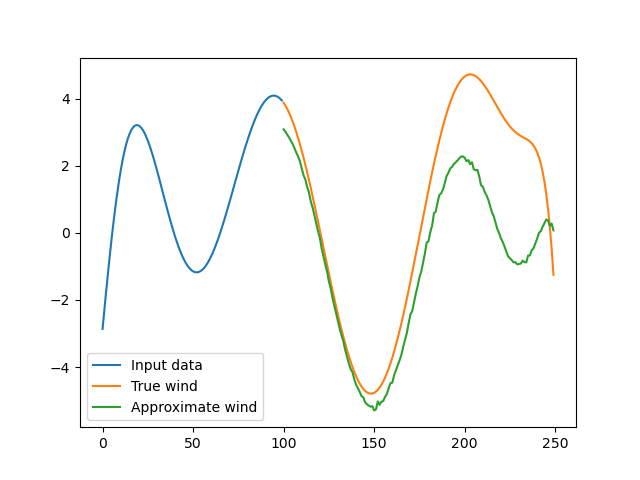

In [186]:
# random_tests = np.random.choice(np.arange(test_inputs.shape[0]),size=10)
# random_inputs = test_inputs[random_tests]
# random_outputs = test_outputs[random_tests]
# for ri,ro in zip(model(random_inputs),random_outputs):
#     print("True: {:.2f}, Approximated: {:.2f}".format(ro,ri[0]))

random_tests = np.random.choice(np.arange(test_inputs.shape[0]))
random_inputs = test_inputs[random_tests]
random_outputs = test_outputs[random_tests]
approx_outputs = np.array(model(np.array([random_inputs]))).flatten()

plt.close()
dom = np.arange(num_steps)
plt.plot(dom[:num_train_steps],random_inputs, label="Input data")
plt.plot(dom[num_train_steps:],random_outputs, label="True wind")
plt.plot(dom[num_train_steps:],approx_outputs, label="Approximate wind")
plt.legend()
plt.show()

## Simulate projectile motion with wind and predicted corrections

In [231]:
def simulate_with_wind_and_corrections(initial_velocity,mass,time_step,winds,corrections):
    """
    Simulate projectile motion with wind and some corrections.
    
    Inputs:
    initial_velocity - the initial velocity of the projectile (np.array)
    mass             - the mass of the object (float)
    time_step        - the time_step used to simulate (float)
    winds            - the wind at each time step
    corrections      - the predicted corrections at each time step
    
    Outputs:
    x                - the positions at each point in time
    """
    # First to find time domain (probably a better way...)
    a = []; v = []; x = []
    
    x.append(np.array([0.0,0.01]))
    v.append(initial_velocity)
    
    g = np.array([0.0,-9.81])
    
    i = 0
    while x[-1][1] > 0:
        drag = np.array([winds[i]/mass, 0.0])
        correction = np.array([corrections[i]/mass, 0.0])
        a.append(g - (drag - correction)*v[-1])
        x.append(x[-1] + time_step*v[-1])
        v.append(v[-1] + time_step*a[-1])
        i += 1
    
    return np.array(x)

In [234]:
ws = generate_wind(200,20,1)

In [239]:
np.array(model(ws[:num_train_steps].reshape((1,-1,1)))).flatten()

array([ 0.5191157 ,  0.5398834 ,  0.52151275,  0.55957055,  0.6045784 ,
        0.6153138 ,  0.58775604,  0.6208692 ,  0.5714568 ,  0.7441213 ,
        0.7228361 ,  0.7948593 ,  0.69053304,  0.91626537,  0.8579125 ,
        0.93007654,  1.0693657 ,  1.0860798 ,  1.2208638 ,  1.2260528 ,
        1.3998137 ,  1.5521164 ,  1.4415741 ,  1.5428019 ,  1.6082909 ,
        1.738199  ,  2.0283096 ,  2.1056304 ,  2.0466347 ,  2.2343144 ,
        2.4503486 ,  2.4463577 ,  2.511717  ,  2.661323  ,  2.8055637 ,
        3.0857081 ,  3.1101694 ,  3.344182  ,  3.129138  ,  3.5789878 ,
        3.7615588 ,  3.7000165 ,  3.912322  ,  3.9715934 ,  4.077185  ,
        4.360678  ,  4.3980923 ,  4.5679774 ,  4.759574  ,  4.7126427 ,
        4.812332  ,  4.898043  ,  5.142113  ,  5.233419  ,  5.1819334 ,
        5.2186666 ,  5.4899573 ,  5.4860344 ,  5.4748416 ,  5.340547  ,
        5.560706  ,  5.434001  ,  5.4857645 ,  5.374102  ,  5.5957875 ,
        5.578596  ,  5.5210667 ,  5.4755116 ,  5.0956593 ,  5.23

FloatSlider(value=65.0, description='Start angle', max=89.0, min=1.0, step=2.0)

FloatSlider(value=8.0, description='Initial velocity', max=10.0, min=1.0, step=0.5)

FloatSlider(value=1.0, description='Mass', max=10.0, min=1.0, step=0.5)

IntSlider(value=5, description='Wind variability', max=20)

FloatSlider(value=1.0, description='Wind strength', max=2.0)

Button(description='Throw ball', style=ButtonStyle())

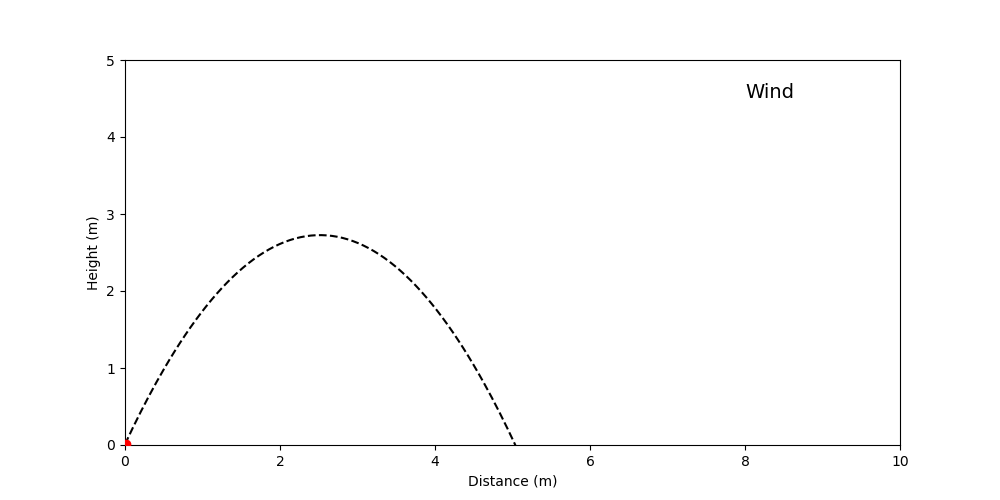

In [243]:
plt.close()
#####################################################################################
# Make slider widgets
#####################################################################################
angle = widgets.FloatSlider(min=1,max=89,step=2,description="Start angle",value = 65)
magnitude = widgets.FloatSlider(min=1,max=10,step=.5,description="Initial velocity",value = 8)
mass = widgets.FloatSlider(min=1,max=10,step=.5,description="Mass",value = 1)
wind_variability = widgets.IntSlider(min=0,max=20,step=1,description="Wind variability",value = 5)
wind_strength = widgets.FloatSlider(min=0,max=2,step=.1,description="Wind strength",value = 1)
play = widgets.Button(description="Throw ball")

display(angle); display(magnitude); display(mass)
display(wind_variability); display(wind_strength)
display(play)

#####################################################################################
# Make functions to update plots when changing sliders
#####################################################################################
def plot_ball_motion(obj):
    # Recompute trajectory
    vx = magnitude.value*np.cos(angle.value*(np.pi/180))
    vy = magnitude.value*np.sin(angle.value*(np.pi/180))
    ws = generate_wind(250,wind_variability.value,wind_strength.value)
    xs = simulate_with_wind(np.array([vx,vy]),mass.value,.01,ws)
    
    # Find predicted future wind
    corrections = np.zeros(len(ws))
    predictions = np.array(model(ws[:num_train_steps].reshape((1,-1,1)))).flatten()
    corrections[num_train_steps:] = predictions
    corr_xs = simulate_with_wind_and_corrections(np.array([vx,vy]),mass.value,.01,ws,corrections)
    
    # Update ball location and wind strength one step at a time
    for i in range(len(xs)):
        x = xs[i]
        cx = corr_xs[i]
        time1 = time.time()
        ball.set_offsets(cx)
        adj_traj.set_data(corr_xs[:i,0],corr_xs[:i,1])
        true_traj.set_data(xs[:i,0],xs[:i,1])
        wind.set_data(dx=-ws[i]/2)
        time2 = time.time()
        time.sleep(.01 - (time2-time1))
        fig.canvas.draw()
        fig.canvas.flush_events()
        
def plot_trajectory(obj):
    # Recompute trajectory
    vx = magnitude.value*np.cos(angle.value*(np.pi/180))
    vy = magnitude.value*np.sin(angle.value*(np.pi/180))
    xs = simulate(np.array([vx,vy]),0,mass.value,.01)
    
    # Update trajectory plot
    traj.set_data(xs[:,0],xs[:,1])
    fig.canvas.draw_idle()
    fig.canvas.flush_events()
    
def change_ball_size(obj):
    ball.set_sizes([mass.value*72])

#####################################################################################
# Initialize plot
#####################################################################################
fig = plt.figure(figsize=(10,5))
vx = magnitude.value*np.cos(angle.value*(np.pi/180))
vy = magnitude.value*np.sin(angle.value*(np.pi/180))
xs = simulate(np.array([vx,vy]),0,mass.value,.01)
traj = plt.plot(xs[:,0],xs[:,1],ls="--",color="black")[0]
true_traj = plt.plot([0],[0],color="blue",zorder=50)[0]
adj_traj = plt.plot([0],[0],color="red",zorder=50)[0]
ball = plt.scatter([0.01],[0.01],color="red",zorder=100)
wind = plt.arrow(8,4.2,0,0,length_includes_head=True,width=.05,color="black")
wind_label = plt.text(8,4.5,"Wind",fontsize=14)
plt.ylabel("Height (m)")
plt.xlabel("Distance (m)")
plt.xlim(0,10)
plt.ylim(0,5)
fig.canvas.draw_idle()
fig.canvas.flush_events()
    
#####################################################################################
# Watch sliders for changes
#####################################################################################
play.on_click(plot_ball_motion)
angle.observe(plot_trajectory)
magnitude.observe(plot_trajectory)
mass.observe(plot_trajectory)
mass.observe(change_ball_size)

# Recurrent neural networks for prediction

In [187]:
# RNN

In [211]:
x = keras.layers.LSTM(30, input_shape=(num_train_steps,1), return_sequences=True)(train_inputs[0].reshape((1,-1,1)))
x = keras.layers.LSTM(30, input_shape=(num_train_steps,30), return_sequences=True)(x)
y = keras.layers.LSTM(30, input_shape=(num_train_steps,30), return_sequences=False)(x)
z = keras.layers.Dense(num_steps-num_train_steps,activation="linear")(y)

In [212]:
z.shape

TensorShape([1, 150])

In [213]:
model2 = keras.Sequential()
model2.add(keras.layers.LSTM(30, input_shape=(num_train_steps, 1), return_sequences=True, unroll=True))
model2.add(keras.layers.LSTM(30, input_shape=(num_train_steps, 30), return_sequences=True, unroll=True))
model2.add(keras.layers.LSTM(30, input_shape=(num_train_steps, 30), return_sequences=False, unroll=True))
model2.add(keras.layers.Dense(num_steps-num_train_steps,activation="linear"))

In [214]:
# Train model
model2.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.MeanSquaredError()
)
history = model2.fit(
    train_inputs,
    train_outputs,
    batch_size=10,
    epochs=20,
    validation_split = 0.2
)

Epoch 1/20
640/640 [==============================] - 29s 29ms/step - loss: 4.2356 - val_loss: 3.7433
Epoch 2/20
640/640 [==============================] - 15s 23ms/step - loss: 3.4203 - val_loss: 3.4043
Epoch 3/20
640/640 [==============================] - 15s 23ms/step - loss: 3.2735 - val_loss: 3.2966
Epoch 4/20
640/640 [==============================] - 15s 23ms/step - loss: 3.2242 - val_loss: 3.2971
Epoch 5/20
640/640 [==============================] - 15s 23ms/step - loss: 3.1514 - val_loss: 3.3927
Epoch 6/20
640/640 [==============================] - 15s 23ms/step - loss: 3.0835 - val_loss: 3.0518
Epoch 7/20
640/640 [==============================] - 15s 23ms/step - loss: 2.9806 - val_loss: 3.0245
Epoch 8/20
640/640 [==============================] - 15s 23ms/step - loss: 2.8828 - val_loss: 3.0055
Epoch 9/20
640/640 [==============================] - 15s 23ms/step - loss: 2.7955 - val_loss: 2.8262
Epoch 10/20
640/640 [==============================] - 15s 24ms/step - loss: 2.671

In [216]:
model3 = keras.Sequential()
model3.add(keras.layers.LSTM(30, batch_input_shape=(1,num_train_steps, 1), return_sequences=True, unroll=True, stateful=True))
model3.add(keras.layers.LSTM(30, batch_input_shape=(1,num_train_steps, 30), return_sequences=True, unroll=True, stateful=True))
model3.add(keras.layers.LSTM(30, batch_input_shape=(1,num_train_steps, 30), return_sequences=False, unroll=True, stateful=True))
model3.add(keras.layers.Dense(num_steps-num_train_steps,activation="linear"))
model3.set_weights(model2.get_weights())

1/1 [==============================] - 0s 18ms/step


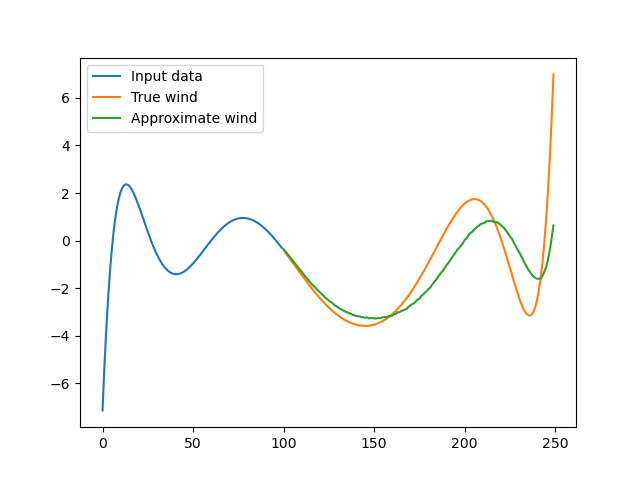

In [228]:
random_tests = np.random.choice(np.arange(test_inputs.shape[0]))
random_inputs = test_inputs[random_tests]
random_outputs = test_outputs[random_tests]

# Run predictions
model3.reset_states()
approx_outputs = model3.predict(random_inputs.reshape((1,-1,1))).flatten()
    
plt.close()
dom = np.arange(num_steps)
plt.plot(dom[:num_train_steps],random_inputs[:num_train_steps], label="Input data")
plt.plot(dom[num_train_steps:],random_outputs, label="True wind")
plt.plot(dom[num_train_steps:],approx_outputs, label="Approximate wind")
plt.legend()
plt.show()